# Algorithmes sur les graphes

Pour ce travail, vous aurez besoin du jeu de donnée *English.dat*.

## Question 1

Construire, comme cela a déjà été fait, la liste d'adjacence sur les mots de quatre lettres sous la forme d'un dictionnaire (dict) d'ensembles (sets).

**Indication** Construction des listes d'adjacence

In [30]:
import os.path

In [31]:
path = os.path.exists('English.dat')
print(path)

True


In [1]:
english4 = {}

with open('English.dat') as file:
    while line := file.readline():
        word = line.rstrip()
        
        if len(word) == 4:
            english4[word] = set()

In [15]:
def count_diff(word1, word2):
    word1_length = len(word1)
    counter = 0
    
    [counter := counter + 1 for i in range(word1_length) if word1[i] != word2[i]]

    return counter

In [22]:
for word1 in english4:
    for word2 in english4:
        if word1 != word2 and count_diff(word1, word2) == 1:
                english4[word1].add(word2)
                english4[word2].add(word1)

## Question 2: Degrés des nœuds

Construire, comme cela a déjà été fait, un dictionnaire renseignant pour chaque nœud le degré

## Question 3: Déterminer les composantes connexes

Vous aurez également besoin de lire [Introduction to graph algorithms: definitions and examples](https://yourbasic.org/algorithms/graph/).

L'algorithme DFS (*depth first search*) permet notamment de connaître combien de composantes connexes (les «continents» du graphe) sont présentes dans le graphe.  Consultez l'article [Graphe connexe](https://fr.wikipedia.org/wiki/Graphe_connexe) de Wikipédia pour réviser la notion de composante connexe.

Vous avez vu l'algorithme récursif DFS (présenté dans la page [Introduction to graph algorithms: definitions and examples](https://yourbasic.org/algorithms/graph/)): il visite tous les nœuds d'un graphe à partir d'un nœud source:

```
DEFINE DFS(G, u)
    IF u is already visited THEN
        RETURN
    END IF
    
    Mark u as visited.
    
    # Perform some operation on v.
    FOR ALL neighbours v of u DO
        DFS(G, v)
    END FOR
END DEFINE
```

Adaptez cet algorithme pour déterminer le nombre de componentes connexes.

**Indication** Principe de l'algorithme DFS pour déterminer le nombre de composantes connexes (cliquez sur les trois points pour révéler l'indication)

Le principe en est relativement simple.  Il suffit d'imaginer que, à partir d'un nœud, on choisisse une couleur (disons jaune) pour le peindre et qu'on visite récursivement tous ses voisins, les voisins de ses voisins, etc., et qu'à chaque fois que l'on visite un nœud on le peigne de la même couleur.  Ainsi tous les nœuds de sa composante connexe partage avec lui la même couleur (jaune).  Puis on cherche un autre nœud qui n'aurait pas encore été peint (et donc appartiendrait à une nouvelle composante connexe).

<center>
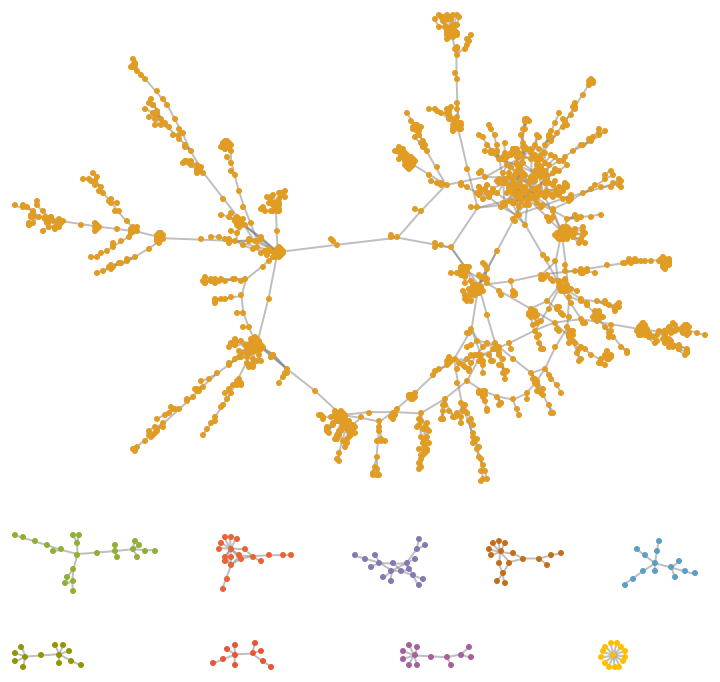
</center>

**Indication** Algorithme DFS (cliquez sur les trois points pour révéler l'indication)

L'algorithme ressemblerait à ceci

```
DEFINE dfs_comp(G, u, c)
    IF u is already visited THEN
        RETURN
    END IF

    Mark  u as visited
    Set u's component as c

    FOR all neighbours v of u DO
        dfs_comp(G, v, c)
    END FOR
END DEFINE

comp = 0 # Component number

FOR each vertex u in G DO
    IF u has not been visited yet THEN
        dfs_comp(G, u, comp)
        comp <- comp + 1
    END IF
END FOR
```

**Indication** Initialisations et prérequis (cliquez sur les trois points pour révéler l'indication)

* Il faut se munir d'un dictionnaire `visited` dont les clefs sont les mots et dont les valeurs sont initialisées à `False` (ou alors initialiser `visited` comme un dictionnaire vide et tester l'existence de l'entrée dans le dictionnaire) — au terme du fonctionnement de l'algorithme, tous les nœuds ont été visités

* Il faut également se munir d'un dictionnaire `component` dont les clefs sont les mots et dont les valeurs sont, pour chaque mot, le numéro de composante connexe

* La variable `G` n'est en fait pas utile dans l'implémentation en Python si les listes d'adjacence sont disponibles sous la forme d'une variable globale `english4`

**Indication** Implémentation (cliquez sur les trois points pour révéler l'indication)

In [24]:
visited = dict() # keys : words, values : False
component = dict() # keys : words, values : numero composante connexe
comp = 0

In [25]:
def dfs_comp(word, component_number):
    if visited.get(word) is not None:
        return
    
    visited[word] = True
    component[word] = component_number
    
    for v in english4[word]:
        dfs_comp(v, component_number)

    return

In [26]:
for word in english4:
    if visited.get(word) is None:
        dfs_comp(word, comp)
        comp += 1

## Problème

* Combien y a-t-il de composantes connexes?  (Réponse: 95)

* Quelle fraction des mots appartient à la composante connexe principale?  (Réponse: 95%)

* Utiliser l'algorithme de Dijkstra pour trouver le plus mot le plus loin de *long*

```
# The algorithm returns two arrays:
# 
# dist[k] holds the length of a shortest path from s to k,
# prev[k] holds the previous vertex in a shortest path from s to k.

Algorithm Dijkstra(G, s)
    for each vertex v in G
        dist[v] ← ∞
        prev[v] ← undefined
    dist[s] ← 0

    Q ← the set of all nodes in G
    while Q is not empty
        u ← vertex in Q with smallest distance in dist[]
        Remove u from Q.
        if dist[u] = ∞
            break
        for each neighbor v of u
            alt ← dist[u] + dist_between(u, v)
            if alt < dist[v]
                dist[v] ← alt
                prev[v] ← u

    return dist[], prev[]
```